In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

**Predicting For DataSet1 by using Gradientdescent**

In [2]:
df = pd.read_csv('/kaggle/input/data1-csv/Data1.csv')

In [3]:
df

,x,y
0,0.1,8.298133
1,0.2,4.919282
2,0.3,4.145139
3,0.4,6.850788
4,0.5,6.375323
...,...,...
95,9.6,28.420698
96,9.7,27.984652
97,9.8,30.336851
98,9.9,30.376285


In [4]:
y = np.array(df['y'])

In [5]:
df = df.drop(columns='y')

In [6]:
df

,x
0,0.1
1,0.2
2,0.3
3,0.4
4,0.5
...,...
95,9.6
96,9.7
97,9.8
98,9.9


In [7]:
n=df.shape[1]
print(n)

1


In [8]:
# w_t+1 = w_t + eta* gradient
def gradient(w):
    result = 0
    s_df = df.sample(frac=1, axis=1, random_state=42) # shuffling the columns of dataframe
    for i in range(len(s_df)):
        r= np.array(s_df.iloc[i][:])
        y_hat = r@w
        result += -2*(y[i]-y_hat)*s_df.iloc[i][0]/len(s_df)
    return result 

In [9]:
eta = 0.00001
w_o = np.zeros((n,1)) #initialize all w with zero.
while True:
    w_n = w_o - eta*gradient(w_o)
    up = w_o - w_n
    down = w_n
    if np.linalg.norm(up)/np.linalg.norm(down) <= 1e-4:
        break
        
    w_o = w_n
w = w_o
print(w)  

[[2.81604935]]


In [10]:
w.shape

(1, 1)

In [11]:
df

,x
0,0.1
1,0.2
2,0.3
3,0.4
4,0.5
...,...
95,9.6
96,9.7
97,9.8
98,9.9


In [12]:
c = 3.59

def predict(df, w):
    lst = []
    for i in range(len(df)):
        r = np.array(df.iloc[i][:])
        r1 = r.reshape((1, -1))  # Reshape to a row vector
        prediction = w.T @ r1 + c
        lst.append(prediction.flatten()) 
    return np.array(lst)


result = predict(df, w)

In [13]:
df['predicted'] = predict(df,w)

In [14]:
df['y'] = y

In [15]:
df

,x,predicted,y
0,0.1,3.871605,8.298133
1,0.2,4.153210,4.919282
2,0.3,4.434815,4.145139
3,0.4,4.716420,6.850788
4,0.5,4.998025,6.375323
...,...,...,...
95,9.6,30.624074,28.420698
96,9.7,30.905679,27.984652
97,9.8,31.187284,30.336851
98,9.9,31.468889,30.376285


In [16]:
def R2(df):
  return 1 - Rss(df) / Tss(df)

In [17]:
def Rss(df):
  return np.sum((df['y'] - df['predicted']) ** 2)

In [18]:
print(Rss(df))

364.1729924049389


In [19]:
def Tss(df):
  return np.sum((df['y'] - np.mean(df['predicted']))** 2)

In [20]:
print(Tss(df))

4944.654609405258


In [21]:
R2(df)

0.9263501657502542

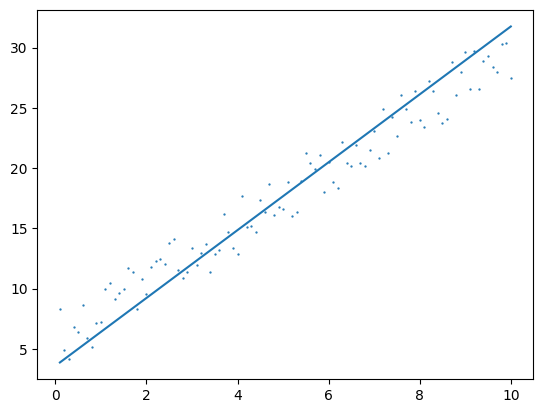

In [22]:
x_list = [float(i) for i in df['x']]
y_list = [float(i) for i in df['y']]
plt.scatter(x_list, y_list,s=0.4)
plt.plot(x_list, df['predicted'])
plt.show()

**Predicting for DataSet4**

In [23]:
df4 = pd.read_csv("/kaggle/input/dataset4/Data4.csv")

In [24]:
df4

,Sl.,x1,x2,x3,y
0,1,0.1,0.311089,0.390541,14.705876
1,2,0.2,0.639066,1.389918,26.585100
2,3,0.3,0.840228,1.939903,36.791509
3,4,0.4,1.299710,2.153009,34.090806
4,5,0.5,0.941784,0.945136,31.118089
...,...,...,...,...,...
95,96,9.6,10.336087,9.979673,183.744594
96,97,9.7,9.928599,10.721891,175.907274
97,98,9.8,10.109046,10.163445,183.992845
98,99,9.9,9.954540,10.562039,173.920425


In [25]:
df4 = df4.drop(columns='Sl.')

In [26]:
y = np.array(df4['y'])

In [27]:
df4 = df4.drop(columns='y')

In [28]:
n=df4.shape[1]
print(n)

3


In [29]:
# w_t+1 = w_t + eta* gradient
def gradient(w,df):
    result = 0
    s_df = df.sample(frac=1, axis=1, random_state=42) # shuffling the columns of dataframe
    for i in range(len(s_df)):
        r= np.array(s_df.iloc[i][:])
        y_hat = r@w
        result += (y[i]-y_hat)*s_df.iloc[i][:]
    return (result*(-2)/len(df)).values.reshape((-1,1))

In [32]:
df4

,x1,x2,x3
0,0.1,0.311089,0.390541
1,0.2,0.639066,1.389918
2,0.3,0.840228,1.939903
3,0.4,1.299710,2.153009
4,0.5,0.941784,0.945136
...,...,...,...
95,9.6,10.336087,9.979673
96,9.7,9.928599,10.721891
97,9.8,10.109046,10.163445
98,9.9,9.954540,10.562039


In [33]:
eta = 0.00001
w_o = np.zeros((n,1)) #initialize all w with zero.
while True:
    w_n = w_o - eta*(gradient(w_o,df4))
    up = w_o - w_n
    down = w_n
    if np.linalg.norm(up)/np.linalg.norm(down) <= 1e-4:
        break
        
    w_o = w_n
w = np.array(w_o)
print(w) 

[[5.3617501 ]
 [5.81427699]
 [6.27443451]]


In [34]:
c = 3.59

def predict(df, w):
    lst = []
    for i in range(len(df)):
        r = np.array(df.iloc[i][:])
        r1 = r.reshape((1, -1))  # Reshape to a row vector
        prediction = w.T @ r1.T + c
        lst.append(prediction.flatten()) 
    return np.array(lst)


result = predict(df4, w)

In [36]:
w.shape

(3, 1)

In [37]:
df4['predicted'] = predict(df4,w)

In [38]:
df4['y'] = y

In [39]:
def R2(df):
  return 1 - Rss(df) / Tss(df)

In [40]:
def Rss(df):
  return np.sum((df['y'] - df['predicted']) ** 2)

In [41]:
print(Rss(df4))

6168.77847886995


In [42]:
def Tss(df):
  return np.sum((df['y'] - np.mean(df['predicted']))** 2)

In [43]:
print(Tss(df4))

219998.99436613996


In [44]:
print(R2(df4))

0.9719599696505732


**Predicting for the dataset2**

In [92]:
df2 = pd.read_csv("/kaggle/input/dataset3/Data2.csv")

In [93]:
df2

,x,y
0,0.1,5.764952e+01
1,0.2,4.740870e+01
2,0.3,6.946902e+01
3,0.4,3.755086e+01
4,0.5,7.860685e+01
...,...,...
95,9.6,3.636073e+05
96,9.7,8.819300e+05
97,9.8,1.053557e+06
98,9.9,4.503040e+05


In [94]:
y = np.array(df2['y'])

In [95]:
df2 = df2.drop(columns='y')

In [96]:
n=df2.shape[1]
print(n)

1


In [97]:
from math import *

In [98]:
# w_t+1 = w_t + eta* gradient
def gradient(w,df):
    result = 0
    s_df = df.sample(frac=1, axis=1, random_state=42) # shuffling the columns of dataframe
    for i in range(len(s_df)):
        r= np.array(s_df.iloc[i][:])
        y_hat = r@w
        result += (log(y[i])-y_hat)*s_df.iloc[i][:]
    return (result*(-2)/len(df)).values.reshape((-1,1))

In [99]:
eta = 0.00001
w_o = np.zeros((n,1)) #initialize all w with zero.
while True:
    w_n = w_o - eta*(gradient(w_o,df2))
    up = w_o - w_n
    down = w_n
    if np.linalg.norm(up)/np.linalg.norm(down) <= 1e-4:
        break
        
    w_o = w_n
w = np.array(w_o)
print(w) 

[[1.3266423]]


In [107]:
c = 0.8 #=log(b0)
b0 = e**c

def predict(df, w):
    lst = []
    for i in range(len(df)):
        r = np.array(df.iloc[i][:])
        r1 = r.reshape((1, -1))  # Reshape to a row vector
        prediction = b0*e**(w.T @ r1)
        lst.append(prediction.flatten()) 
    return np.array(lst)


result = predict(df2, w)

/tmp/ipykernel_41/3466927622.py:9: RuntimeWarning: overflow encountered in power
  prediction = b0*e**(w.T @ r1)


In [108]:
w.shape

(1, 1)

In [109]:
df2['predicted'] = predict(df2,w)

/tmp/ipykernel_41/3466927622.py:9: RuntimeWarning: overflow encountered in power
  prediction = b0*e**(w.T @ r1)


In [110]:
df2['y'] = y

In [111]:
def R2(df):
  return 1 - Rss(df) / Tss(df)

In [112]:
def Rss(df):
  return np.sum((df['y'] - df['predicted']) ** 2)

In [113]:
print(Rss(df2))

860643339506.3549


In [114]:
def Tss(df):
  return np.sum((df['y'] - np.mean(df['predicted']))** 2)

In [115]:
print(Tss(df2))

4235792521506.2754


In [116]:
print(R2(df2))

0.7968164552119507


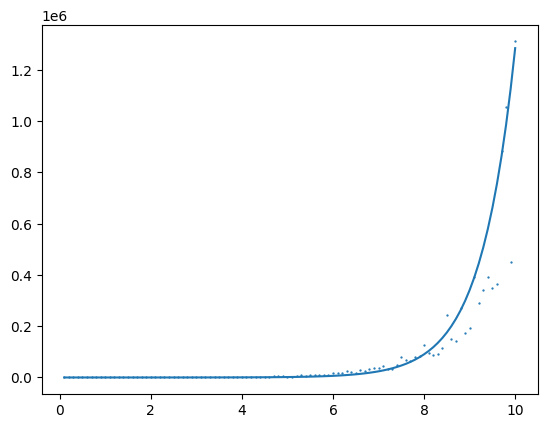

In [117]:
x_list = [float(i) for i in df2['x']]
y_list = [float(i) for i in df2['y']]
plt.scatter(x_list, y_list,s=0.4)
plt.plot(x_list, df2['predicted'])
plt.show()